## Plotting with Matplotlib

In [12]:
## https://matplotlib.org/stable/gallery/index.html

import matplotlib.pyplot as plt
import numpy as np

### Stacked bar chart

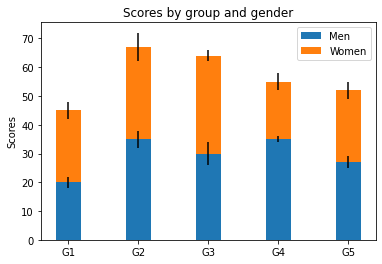

In [13]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

### Errorbar

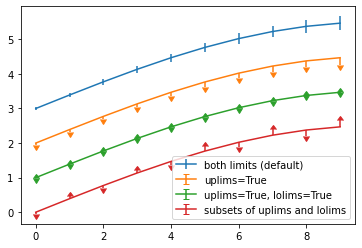

In [14]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

### Filling the area between lines

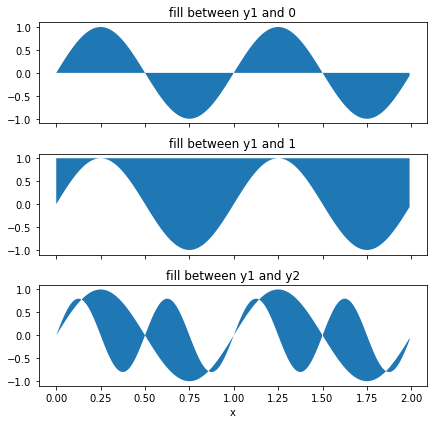

In [15]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax1.fill_between(x, y1)
ax1.set_title('fill between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_title('fill between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_title('fill between y1 and y2')
ax3.set_xlabel('x')
fig.tight_layout()

### Confidence bands

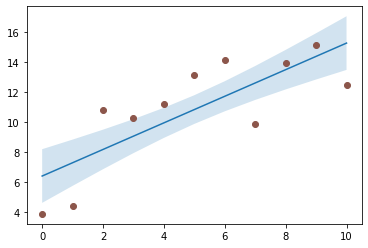

In [11]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

### Scatter plot

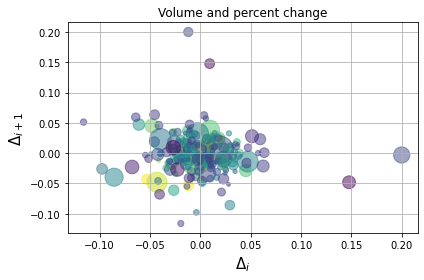

In [16]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

### Matrix plot

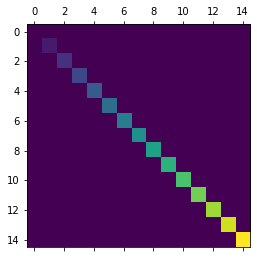

In [17]:
# a 2D array with linearly increasing values on the diagonal
a = np.diag(range(15))

plt.matshow(a)

plt.show()

### Histograms

(array([3.0000e+00, 1.9000e+01, 8.1000e+01, 3.4600e+02, 1.0120e+03,
        2.5720e+03, 5.3300e+03, 9.6080e+03, 1.3771e+04, 1.6979e+04,
        1.7008e+04, 1.3932e+04, 9.6870e+03, 5.5300e+03, 2.6450e+03,
        1.0170e+03, 3.5100e+02, 9.1000e+01, 1.3000e+01, 5.0000e+00]),
 array([0.29231205, 0.76216057, 1.23200909, 1.70185762, 2.17170614,
        2.64155466, 3.11140318, 3.5812517 , 4.05110022, 4.52094874,
        4.99079726, 5.46064578, 5.9304943 , 6.40034282, 6.87019134,
        7.34003986, 7.80988838, 8.27973691, 8.74958543, 9.21943395,
        9.68928247]),
 <BarContainer object of 20 artists>)

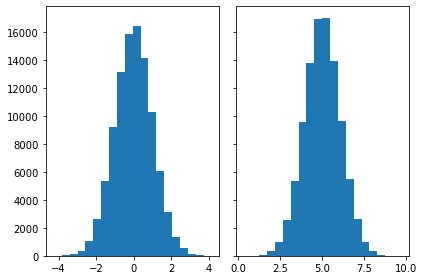

In [19]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)